[[3514, 4999], [4999, 1727], [3514, 1727], [9069, 4999], [9069, 3514], [4999, 7494], [7494, 1727], [7494, 9069]]


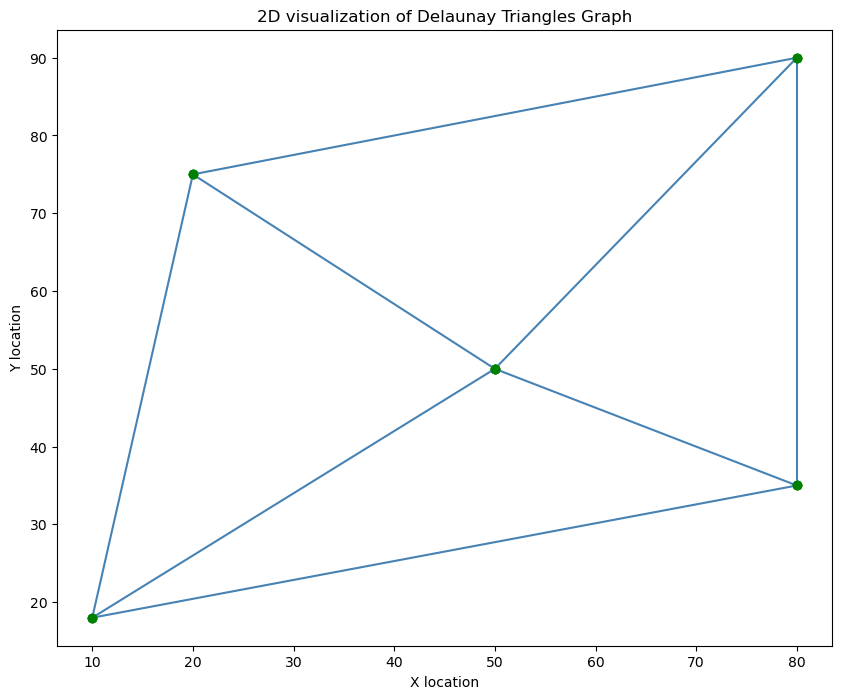

[30, 7]


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.spatial import Delaunay


%matplotlib inline
rcParams['figure.figsize'] = 10, 8


class networkDelanunay:
    def __init__(self, N):
        self.firstPtInsert = False
        self.points = []
        self.N = N
        self.dtriangles = []
        self.xyloc = {}
        self.Tlines = []
        self.lines = []
        
    def add_points_from_list(self, points):
        self.points = points.copy()
        self.firstPtInsert = True
        
    def add_point(self, x, y):
        if self.firstPtInsert == False:
            self.points = np.array([[x,y]])
            self.firstPtInsert = True
        else: 
            pt = np.array([[x,y]])
            self.points = np.concatenate((self.points,pt), axis=0)
    
    
    def createDelaunayTriangles(self):
        tri = Delaunay(self.points)
        self.dtriangles = self.points[tri.simplices].copy()
        
    def plotNetwork(self): #TODO
        for line in self.lines:
            x = []
            y = []
            x.append(self.get_xy_from_point(line[0])[0])
            y.append(self.get_xy_from_point(line[0])[1])
            x.append(self.get_xy_from_point(line[1])[0])
            y.append(self.get_xy_from_point(line[1])[1])
            plt.plot(x, y, 'steelblue', marker='o', mfc='green', mec='green')
        
        plt.title('2D visualization of Delaunay Triangles Graph')
        plt.xlabel("X location")
        plt.ylabel('Y location')
        plt.show()

    def generatepointxyloc(self):
        loc = {}
        x = 1
        y = 1
        
        for i in range(1, ((self.N+1)**2)+1):
            loc[i] = [x,y]
            if x%(self.N+1) == 0:
                x = 1
                y += 1
            else:
                x += 1
        
        self.xyloc = loc.copy()

    def conDTriang_to_line(self):
        lines = []
        
        for i in range(len(self.dtriangles)):
            pt1 = list(self.xyloc.values()).index(list(self.dtriangles[i][0]))+1
            pt2 = list(self.xyloc.values()).index(list(self.dtriangles[i][1]))+1
            pt3 = list(self.xyloc.values()).index(list(self.dtriangles[i][2]))+1
            lines.append([[pt1, pt2], [pt2, pt3], [pt1, pt3]])
        
        self.Tlines = lines.copy()
        


    def extractUniqueLines(self):
        all_arrays = []
        for i in range(len(self.Tlines)):
            for j in range(0, 3):
                all_arrays.append(list(self.Tlines[i][j]))
        
        result = []
        for i in range(0, len(all_arrays)):
            if ([all_arrays[i][0], all_arrays[i][1]] in result) or ([all_arrays[i][1], all_arrays[i][0]] in result):
                continue
            else:
                result.append(all_arrays[i])
        
        self.lines = result.copy()
        
    def getPoints(self):
        return self.points
    
    def get_point_from_xy(self, x, y):
        return list(self.xyloc.values()).index([x,y])+1

    def get_xy_from_point(self, pt):
        return self.xyloc[pt]
    
    def getDtriangles(self):
        return self.dtriangles
    
    def getTlines(self):
        return self.Tlines
    
    def getLines(self):
        return self.lines
    
    def get_xyloc(self):
        return self.xyloc          
        

    def createDelaunayNetwork(self):
        self.createDelaunayTriangles()
        self.generatepointxyloc()
        self.conDTriang_to_line()
        self.extractUniqueLines()
        
    def getDelaunayNetwork(self):
        return self.lines
    
    
    def add_tie_in_point(self, tiepoint, targetsource_sink):
        tieptloc = self.get_point_from_xy(tiepoint[0], tiepoint[1])
        targetptloc = self.get_point_from_xy(targetsource_sink[0], targetsource_sink[1])
        
        self.lines.append([tieptloc,targetptloc])
    
    def delete_line_path(self, pt1_xy, pt2_xy):
        pt1 = self.get_point_from_xy(pt1_xy[0], pt1_xy[1])
        pt2 = self.get_point_from_xy(pt2_xy[0], pt2_xy[1])
        
        if [pt1, pt2] in self.lines:
            self.lines.remove([pt1, pt2])
        elif [pt2, pt1] in self.lines:
            self.lines.remove([pt2, pt1])
            
            
            
    
if __name__ == '__main__':
    points = np.array([[10,18],[20,75],[50,50],[80,35], [80,90]])
    N = 100
    D = networkDelanunay(N)
    D.add_points_from_list(points)
   
    
    D.createDelaunayNetwork()
    print(D.getDelaunayNetwork())
#     D.plotNetwork()
    print(D.get_xy_from_point(636))